In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', encoding = "ISO-8859-1")
df.head()

City Population Violent\ncrime  \
0             Adams Village      1,861              0   
1  Addison Town and Village      2,577              3   
2             Akron Village      2,846              3   
3                    Albany     97,956            791   
4            Albion Village      6,388             23   

   Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
0                                     0.0                           NaN   
1                                     0.0                           NaN   
2                                     0.0                           NaN   
3                                     8.0                           NaN   
4                                     0.0                           NaN   

  Rape\n(legacy\ndefinition)2 Robbery Aggravated\nassault Property\ncrime  \
0                           0       0                   0              12   
1                           0       0                   3              24   
2                           0       0                   3              16   
3                          30     227                 526           4,090   
4                           3       4                  16             223   

  Burglary Larceny-\ntheft Motor\nvehicle\ntheft  Arson3  
0        2              10                     0     0.0  
1        3              20                     1     0.0  
2        1              15                     0     0.0  
3      705           3,243                   142     NaN  
4       53             165                     5     NaN

In [3]:
df[-4:]

City Population  \
347                                      Yorktown Town     36,643   
348  1 The figures shown in this column for the off...        NaN   
349  2 The figures shown in this column for the off...        NaN   
350  3 The FBI does not publish arson data unless i...        NaN   

    Violent\ncrime  Murder and\nnonnegligent\nmanslaughter  \
347             15                                     0.0   
348            NaN                                     NaN   
349            NaN                                     NaN   
350            NaN                                     NaN   

     Rape\n(revised\ndefinition)1 Rape\n(legacy\ndefinition)2 Robbery  \
347                           NaN                           0       2   
348                           NaN                         NaN     NaN   
349                           NaN                         NaN     NaN   
350                           NaN                         NaN     NaN   

    Aggravated\nassault Property\ncrime Burglary Larceny-\ntheft  \
347                  13             334       45             287   
348                 NaN             NaN      NaN             NaN   
349                 NaN             NaN      NaN             NaN   
350                 NaN             NaN      NaN             NaN   

    Motor\nvehicle\ntheft  Arson3  
347                     2     NaN  
348                   NaN     NaN  
349                   NaN     NaN  
350                   NaN     NaN

In [4]:
df = df[:-3]
df[-4:]

City Population Violent\ncrime  \
344  Woodridge Village        829              7   
345     Woodstock Town      5,931              2   
346            Yonkers    199,134          1,036   
347      Yorktown Town     36,643             15   

     Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
344                                     0.0                           NaN   
345                                     0.0                           NaN   
346                                     6.0                           NaN   
347                                     0.0                           NaN   

    Rape\n(legacy\ndefinition)2 Robbery Aggravated\nassault Property\ncrime  \
344                           0       0                   7              17   
345                           0       0                   2              58   
346                          25     390                 615           2,368   
347                           0       2                  13             334   

    Burglary Larceny-\ntheft Motor\nvehicle\ntheft  Arson3  
344        8               9                     0     0.0  
345       13              45                     0     NaN  
346      470           1,662                   236    10.0  
347       45             287                     2     NaN

In [5]:
predict = pd.DataFrame()
predict['PropertyCrime'] = df['Property\ncrime'].str.replace(',','').astype(float)

In [6]:
feats = pd.DataFrame()
feats['PropertyCrime'] = df['Property\ncrime'].str.replace(',','').astype(float)
feats['Population'] = df['Population'].fillna(0)
feats['Population'] = feats['Population'].str.replace(',','').astype(float)
feats['PopSq'] = np.square(feats['Population'])
feats['MurderFull'] = df['Murder and\nnonnegligent\nmanslaughter'].astype(float)
feats['Murder'] = [m if m == 0 else m/m for m in df['Murder and\nnonnegligent\nmanslaughter']  ]
feats['RobberyFull'] = df['Robbery'].fillna(0)
feats['RobberyFull'] = feats['RobberyFull'].str.replace(',','').astype(float)
feats['Robbery'] = [r if r == 0 else r/r for r in feats['RobberyFull']]

In [7]:
def BoxHistOutliers(column, df_focus):
    import seaborn as sns
    
    colList = df_focus[column]
    
    # plots
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=column, data=df_focus)
    
    plt.subplot(1, 2, 2)
    g=sns.distplot(colList, kde=False, bins=5)
    
    # rotate label for large tick values on histagram x axis
    if (colList.max() > 9999):
        plt.setp(g.get_xticklabels(), rotation=45)

    plt.show()

In [8]:
 feats.head()

PropertyCrime  Population         PopSq  MurderFull  Murder  RobberyFull  \
0           12.0      1861.0  3.463321e+06         0.0     0.0          0.0   
1           24.0      2577.0  6.640929e+06         0.0     0.0          0.0   
2           16.0      2846.0  8.099716e+06         0.0     0.0          0.0   
3         4090.0     97956.0  9.595378e+09         8.0     1.0        227.0   
4          223.0      6388.0  4.080654e+07         0.0     0.0          4.0   

   Robbery  
0      0.0  
1      0.0  
2      0.0  
3      1.0  
4      1.0

In [9]:
feats.describe()

PropertyCrime    Population         PopSq  MurderFull      Murder  \
count     348.000000  3.480000e+02  3.480000e+02  348.000000  348.000000   
mean      792.606322  4.003763e+04  2.035547e+11    1.566092    0.140805   
std      7659.724746  4.500374e+05  3.778876e+12   18.303673    0.348321   
min         0.000000  5.260000e+02  2.766760e+05    0.000000    0.000000   
25%        40.500000  3.003000e+03  9.018117e+06    0.000000    0.000000   
50%       112.500000  7.233500e+03  5.232568e+07    0.000000    0.000000   
75%       341.000000  1.842750e+04  3.397536e+08    0.000000    0.000000   
max    141971.000000  8.396126e+06  7.049493e+13  335.000000    1.000000   

        RobberyFull     Robbery  
count    348.000000  348.000000  
mean      72.902299    0.600575  
std     1031.032873    0.490486  
min        0.000000    0.000000  
25%        0.000000    0.000000  
50%        1.000000    1.000000  
75%        5.000000    1.000000  
max    19170.000000    1.000000

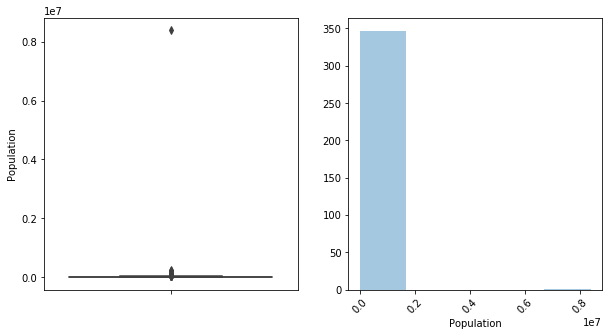

In [10]:
# Histogram and box plot
BoxHistOutliers('Population', feats)

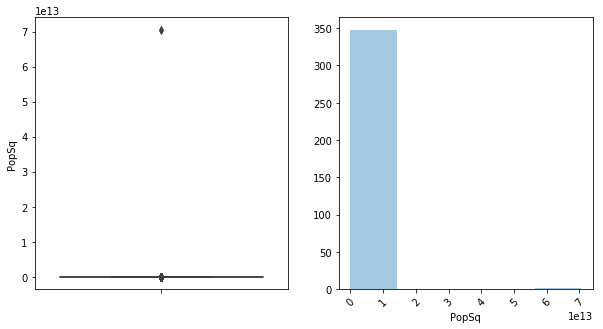

In [11]:
# Histogram and box plot
BoxHistOutliers('PopSq', feats)

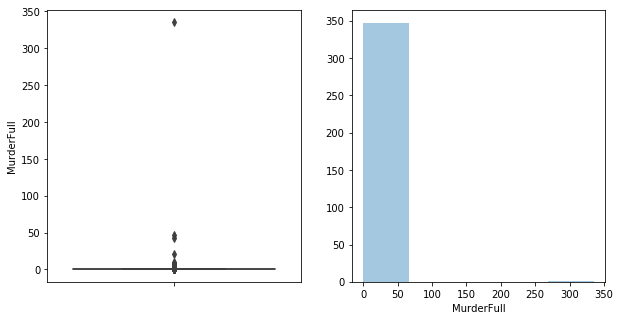

In [12]:
BoxHistOutliers('MurderFull', feats)

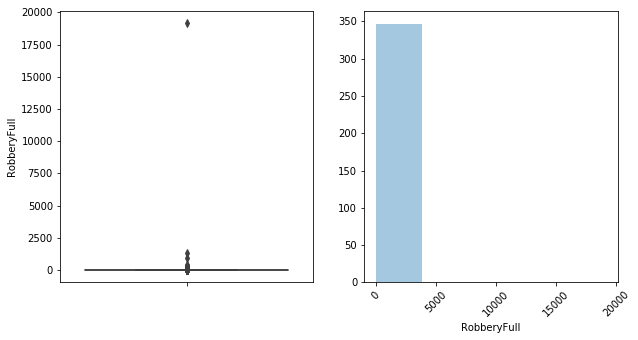

In [13]:
BoxHistOutliers('RobberyFull', feats)

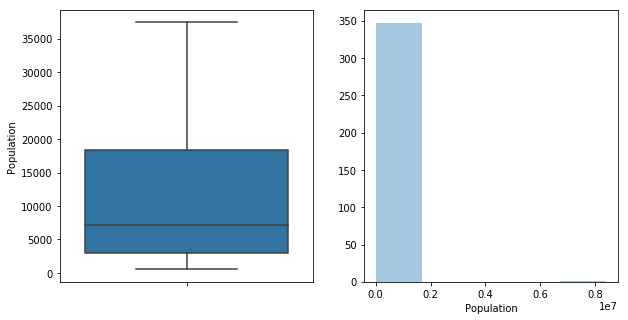

In [14]:
# plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='Population', data=feats, showfliers=False)
    
plt.subplot(1, 2, 2)
g=sns.distplot(feats['Population'], kde=False, bins=5)

plt.show()

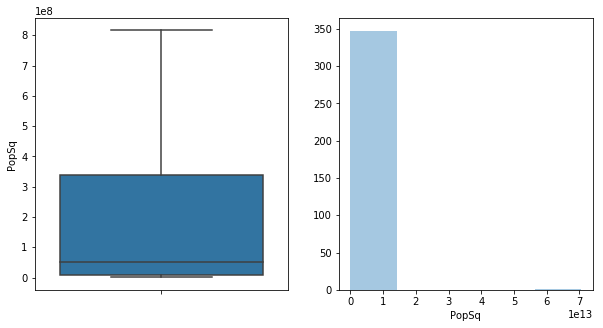

In [15]:
# plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='PopSq', data=feats, showfliers=False)
    
plt.subplot(1, 2, 2)
g=sns.distplot(feats['PopSq'], kde=False, bins=5)

plt.show()

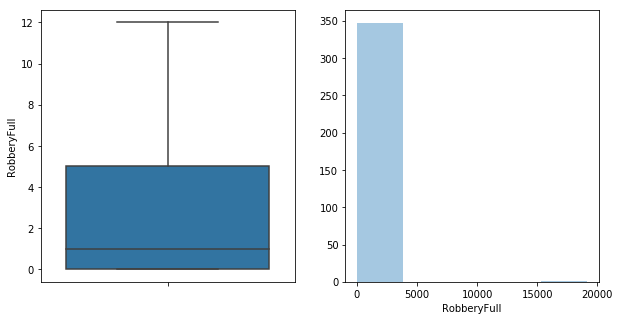

In [16]:
# plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='RobberyFull', data=feats, showfliers=False)
    
plt.subplot(1, 2, 2)
g=sns.distplot(feats['RobberyFull'], kde=False, bins=5)

plt.show()

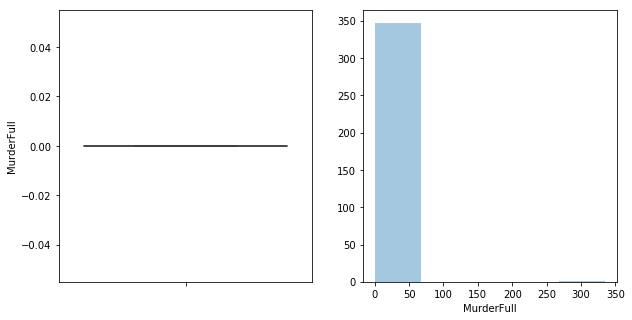

In [17]:
# plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='MurderFull', data=feats, showfliers=False)
    
plt.subplot(1, 2, 2)
g=sns.distplot(feats['MurderFull'], kde=False, bins=5)

plt.show()

In [18]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.52130152e-02  -9.44818779e-10  -6.46504116e+01   1.04837375e+02
    2.07765121e+00   1.22380130e+02]]

Intercept: 
 [-21.14821481]

R-squared:
0.998780265433


In [19]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.52130152e-02  -9.44818779e-10  -6.46504116e+01   1.04837375e+02
    2.07765121e+00   1.22380130e+02]]

Intercept: 
 [-21.14821481]

R-squared:
0.998780265433


# Assumption one: linear relationship

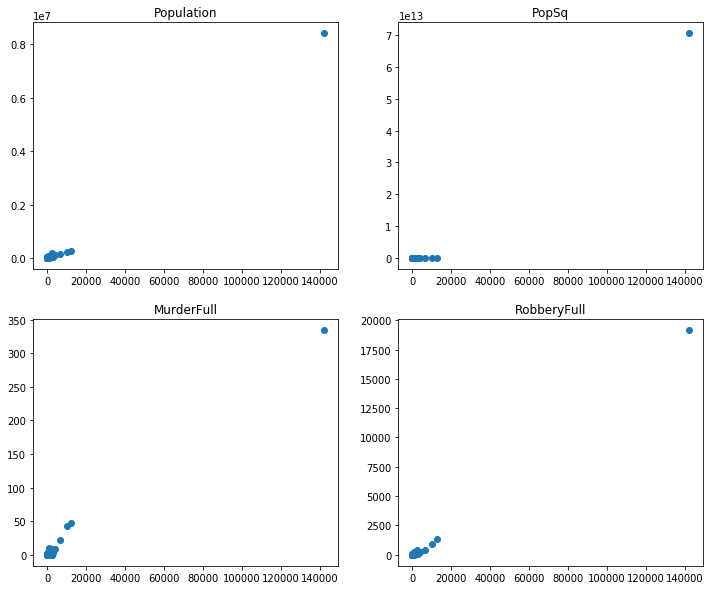

In [20]:
outcome = predict['PropertyCrime']

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(outcome, feats['Population'])
plt.title('Population')

plt.subplot(2, 2, 2)
plt.scatter(outcome, feats['PopSq'])
plt.title('PopSq')

plt.subplot(2, 2, 3)
plt.scatter(outcome, feats['MurderFull'])
plt.title('MurderFull')

plt.subplot(2, 2, 4)
plt.scatter(outcome, feats['RobberyFull'])
plt.title('RobberyFull')

plt.show()


### Remove Outlier

In [21]:
# identify outlier
feats[feats['Population'] >= np.percentile(feats['Population'], 100)]

PropertyCrime  Population         PopSq  MurderFull  Murder  RobberyFull  \
216       141971.0   8396126.0  7.049493e+13       335.0     1.0      19170.0   

     Robbery  
216      1.0

In [22]:
# remove outlier
featsRmvOut1 = pd.DataFrame()
featsRmvOut1 = feats[feats['Population'] < np.percentile(feats['Population'], 100)].copy()

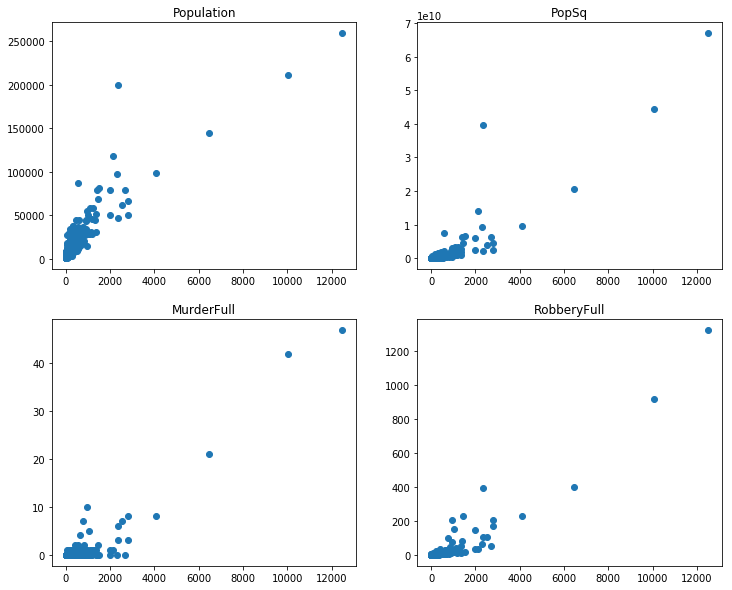

In [23]:
outcome = featsRmvOut1['PropertyCrime']

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(outcome, featsRmvOut1['Population'])
plt.title('Population')

plt.subplot(2, 2, 2)
plt.scatter(outcome, featsRmvOut1['PopSq'])
plt.title('PopSq')

plt.subplot(2, 2, 3)
plt.scatter(outcome, featsRmvOut1['MurderFull'])
plt.title('MurderFull')

plt.subplot(2, 2, 4)
plt.scatter(outcome, featsRmvOut1['RobberyFull'])
plt.title('RobberyFull')

plt.show()

In [24]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = featsRmvOut1['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = featsRmvOut1[['Population','PopSq','Murder','Robbery','MurderFull']]
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  2.15387475e-02  -4.02431033e-08  -1.84037572e+02   6.56656187e+01
    1.91354829e+02]]

Intercept: 
 [-47.97096955]

R-squared:
0.934177038549


### Create New Feature for Square Root of Robbery Full Value

In [25]:
featsRmvOsqrRt = pd.DataFrame()
featsRmvOsqrRt = featsRmvOut1.copy()
featsRmvOsqrRt['RobberyFullSqRt'] = [math.sqrt(x) for x in featsRmvOut1['RobberyFull']]

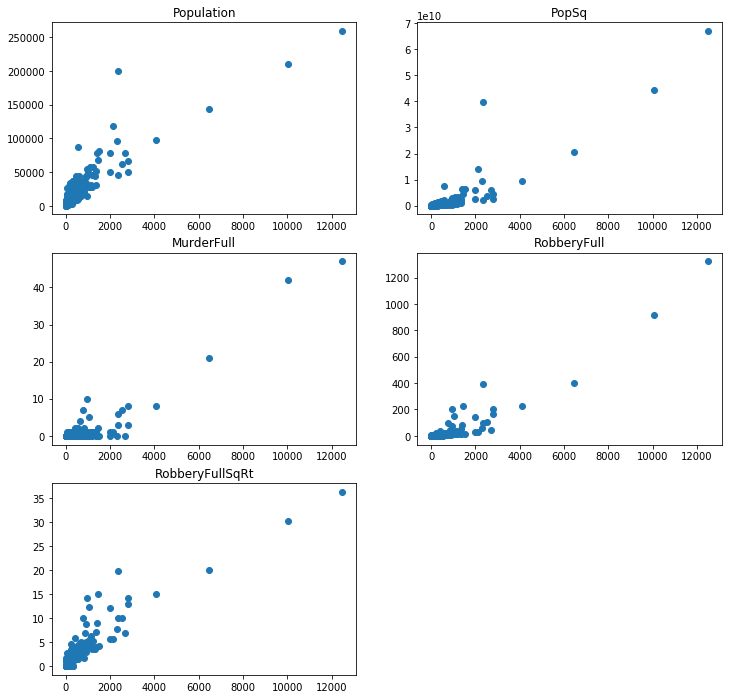

In [26]:
outcome = featsRmvOsqrRt['PropertyCrime']

plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.scatter(outcome, featsRmvOsqrRt['Population'])
plt.title('Population')

plt.subplot(3, 2, 2)
plt.scatter(outcome, featsRmvOsqrRt['PopSq'])
plt.title('PopSq')

plt.subplot(3, 2, 3)
plt.scatter(outcome, featsRmvOsqrRt['MurderFull'])
plt.title('MurderFull')

plt.subplot(3, 2, 4)
plt.scatter(outcome, featsRmvOsqrRt['RobberyFull'])
plt.title('RobberyFull')

plt.subplot(3, 2, 5)
plt.scatter(outcome, featsRmvOsqrRt['RobberyFullSqRt'])
plt.title('RobberyFullSqRt')

plt.show()

In [27]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = featsRmvOsqrRt['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = featsRmvOsqrRt[['Population','PopSq','Murder','Robbery','RobberyFullSqRt','MurderFull']]
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.63515912e-02  -3.04310816e-08  -2.37954063e+02  -1.25278892e+01
    6.19407805e+01   1.60283613e+02]]

Intercept: 
 [-24.09849892]

R-squared:
0.939796179308


# QUESTION:

 I got rid of the outlier in the Population feature in order to get a better view of the relationship in the scatter plots.  These scatter plots are all grouped toward the lower left. Is there a transformation that I can run on them so that they are more linear?
 
 The full number of Robberies looked quadratic relationship so I added another feature that took the square root of the Number of Robberies.  This straightened out the line, however there is still a grouping near the origin.


# Assumption two: multivariate normalityÂ¶

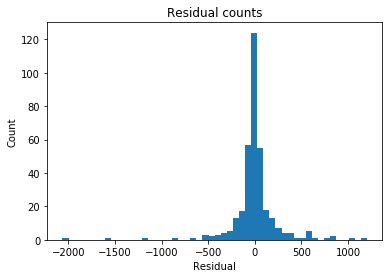

In [28]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = featsRmvOsqrRt['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual, bins=50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Remove More Outliers

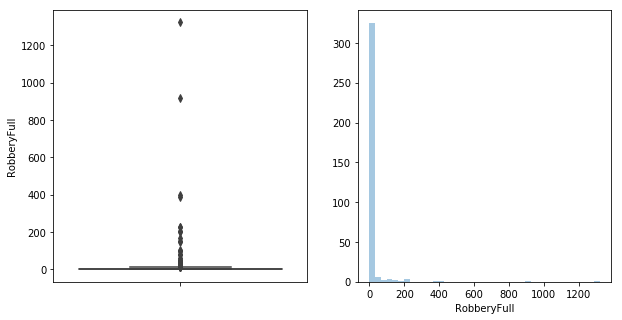

In [29]:
   
# plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='RobberyFull', data=featsRmvOsqrRt)
    
plt.subplot(1, 2, 2)
g=sns.distplot(featsRmvOsqrRt['RobberyFull'], kde=False, bins=40)

plt.show()
    

In [30]:
# identify outliers in Robbery
featsRmvOsqrRt[featsRmvOsqrRt['RobberyFull'] >= np.percentile(featsRmvOsqrRt['RobberyFull'], 95)]

PropertyCrime  Population         PopSq  MurderFull  Murder  RobberyFull  \
3           4090.0     97956.0  9.595378e+09         8.0     1.0        227.0   
22          2349.0     46304.0  2.144060e+09         3.0     1.0        101.0   
35         12491.0    258789.0  6.697175e+10        47.0     1.0       1322.0   
108          933.0     43214.0  1.867450e+09         0.0     0.0         76.0   
126         2303.0     96667.0  9.344509e+09         0.0     0.0         60.0   
140          958.0     55198.0  3.046819e+09        10.0     1.0        204.0   
152         1353.0     51506.0  2.652868e+09         1.0     1.0         51.0   
206         1436.0     68071.0  4.633661e+09         2.0     1.0        228.0   
209         1040.0     28571.0  8.163020e+08         5.0     1.0        150.0   
214         1391.0     78800.0  6.209440e+09         0.0     0.0         81.0   
218         2807.0     49574.0  2.457581e+09         3.0     1.0        166.0   
262          787.0     30778.0  9.472853e+08         7.0     1.0        100.0   
272        10051.0    210562.0  4.433636e+10        42.0     1.0        918.0   
285         2800.0     66041.0  4.361414e+09         8.0     1.0        203.0   
310         6473.0    143834.0  2.068822e+10        21.0     1.0        400.0   
315         1985.0     49898.0  2.489810e+09         1.0     1.0        145.0   
321         2528.0     61686.0  3.805163e+09         7.0     1.0        102.0   
346         2368.0    199134.0  3.965435e+10         6.0     1.0        390.0   

     Robbery  RobberyFullSqRt  
3        1.0        15.066519  
22       1.0        10.049876  
35       1.0        36.359318  
108      1.0         8.717798  
126      1.0         7.745967  
140      1.0        14.282857  
152      1.0         7.141428  
206      1.0        15.099669  
209      1.0        12.247449  
214      1.0         9.000000  
218      1.0        12.884099  
262      1.0        10.000000  
272      1.0        30.298515  
285      1.0        14.247807  
310      1.0        20.000000  
315      1.0        12.041595  
321      1.0        10.099505  
346      1.0        19.748418

In [31]:
# remove outlier
featsRmvOut2 = pd.DataFrame
featsRmvOut2 = featsRmvOsqrRt.copy()
featsRmvOut2 = featsRmvOsqrRt[featsRmvOsqrRt['RobberyFull'] < np.percentile(featsRmvOsqrRt['RobberyFull'], 95)].copy()

In [32]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = featsRmvOut2['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = featsRmvOut2[['Population','PopSq','Murder','Robbery','RobberyFullSqRt','MurderFull']]
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  8.26370161e-03   4.94998900e-08   1.06885254e+02  -1.07432569e+02
    1.36402302e+02  -1.46717119e+02]]

Intercept: 
 [ 9.10466405]

R-squared:
0.816280244998


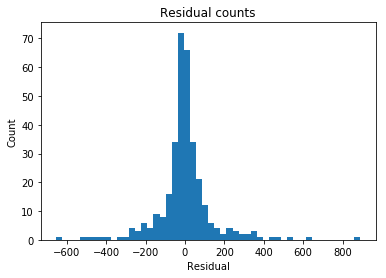

In [33]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = featsRmvOut2['PropertyCrime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual, bins=50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# QUESTION:

The histogram for the Residual counts initially had a very high peak and was skewed left.  The Outliers for the "Population" feature had already been dropped so I looked for another feature with outliers.  The Full number of Robberies had outliers so I dropped those.  After dropping them, the peak is lower and it is skewed slightly right now, however the R-squared value is lower.  Is this correct?

# Assumption three: homoscedasticity

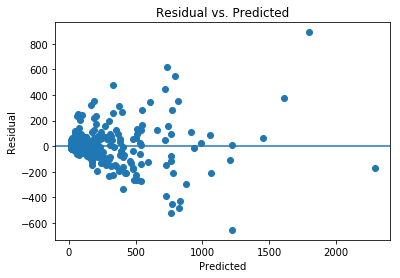

In [34]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# QUESTION:

This doesn't look good. The pattern groups up near zero then is spread all over the place.  How do I tell what to do to the to transform the dependent variable?  How can I tell what features to add to target the poorly-estimated areas?

# Assumption four: low multicollinearity

In [35]:
correlation_matrix = X.corr()
display(correlation_matrix)

Population     PopSq    Murder   Robbery  RobberyFullSqRt  \
Population         1.000000  0.884452  0.406541  0.427960         0.709430   
PopSq              0.884452  1.000000  0.324354  0.234909         0.506569   
Murder             0.406541  0.324354  1.000000  0.265105         0.446519   
Robbery            0.427960  0.234909  0.265105  1.000000         0.729431   
RobberyFullSqRt    0.709430  0.506569  0.446519  0.729431         1.000000   
MurderFull         0.397685  0.315575  0.889786  0.238691         0.435576   

                 MurderFull  
Population         0.397685  
PopSq              0.315575  
Murder             0.889786  
Robbery            0.238691  
RobberyFullSqRt    0.435576  
MurderFull         1.000000

In [36]:
from sklearn.decomposition import PCA 


sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [  1.00000000e+00   3.63762910e-11   8.28387311e-19   1.46788578e-19
   7.65723267e-20   9.87326990e-21]


In [37]:
# drop all but population

# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = featsRmvOut2['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = featsRmvOut2[['Population']]
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.0193434]]

Intercept: 
 [ 0.80931028]

R-squared:
0.707408103929


# QUESTION:

The return from the PCE indicated that 100% of the variation was explained by the Population.  I removed all of the other features but the R-squared is very low.  Did I do this right?

# Write-up

Using the following features:

Population

Population Squared

Murder (if greater than one: True, otherwise: False)

Robbery (if greater than one: True, otherwise: False)


Population and Population Squared had one extreme outlier.  However the R squared result for these features was .996. 

In [92]:
# Instantiate and fit model
regr = linear_model.LinearRegression()
Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
X = feats[['Population','PopSq','Murder','Robbery']]
regr.fit(X,Y)
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  3.46570268e-02  -2.11108019e-09   1.51866535e+01  -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared:
0.996124710499


In [93]:
from sklearn.model_selection import cross_val_score
#data = feats[['Population','PopSq','Murder','Robbery']]
#target = feats['PropertyCrime'].values.reshape(-1, 1)

cross_val_score(regr, X, Y, cv=10)

array([  7.60520539e-01,   8.23393294e-01,  -9.24026836e-03,
         5.04913291e-01,   4.74244233e-01,   4.19961624e-01,
        -3.37873798e+03,   8.21731323e-01,   8.86333090e-01,
        -9.81038943e-01])

# Test Statistics

In [39]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [40]:
#Y = feats['PropertyCrime'].values.reshape(-1, 1)
#Population	PopSq	Murder	Robbery
#X = feats[['Population','PopSq','Murder','Robbery','RobberyFull','MurderFull']]
#regr.fit(X,Y)

In [41]:
linear_formula = 'PropertyCrime ~ Population+PopSq+Murder+Robbery+RobberyFull+MurderFull'

In [90]:
lm = smf.ols(formula=linear_formula, data=feats).fit()

### Coefficients

In [43]:
lm.params

Intercept     -2.114821e+01
Population     1.521302e-02
PopSq         -9.448188e-10
Murder        -6.465041e+01
Robbery        1.048374e+02
RobberyFull    2.077651e+00
MurderFull     1.223801e+02
dtype: float64

### Initial p-values

In [44]:
initPvals = lm.pvalues
print(initPvals)

Intercept      3.667932e-01
Population     1.628776e-35
PopSq          1.053240e-17
Murder         2.075162e-01
Robbery        1.541181e-03
RobberyFull    2.549472e-03
MurderFull     3.068609e-14
dtype: float64


### Initial R-squared

In [45]:
initRsq = lm.rsquared
print(initRsq)

0.998780265433


### Ref-it #1

In [46]:
linear_formula1 = 'PropertyCrime ~ Population+PopSq+Robbery+RobberyFull+MurderFull'
lm1 = smf.ols(formula=linear_formula1, data=feats).fit()

In [47]:
initPvals = lm1.pvalues
print(initPvals)

Intercept      4.061628e-01
Population     3.673483e-37
PopSq          2.110196e-17
Robbery        2.662292e-03
RobberyFull    5.782981e-04
MurderFull     4.469698e-14
dtype: float64


### Ref-it 1 R-Squared

In [48]:
reFit1_Rsq = lm1.rsquared
print(reFit1_Rsq)

0.998774561232


### Confidence Intervals for Refit 1

In [49]:
lm1.conf_int()

0             1
Intercept   -6.544112e+01  2.654556e+01
Population   1.273543e-02  1.675817e-02
PopSq       -1.128229e-09 -7.221209e-10
Robbery      3.436909e+01  1.619791e+02
RobberyFull  9.969178e-01  3.598809e+00
MurderFull   8.790222e+01  1.464011e+02

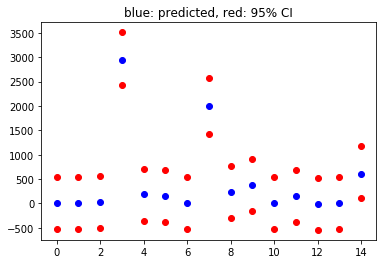

In [50]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm1)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

### Re-fit 2: Remove Murder Feature

In [51]:
linear_formula2 = 'PropertyCrime ~ Population+Robbery+RobberyFull+MurderFull'
lm2 = smf.ols(formula=linear_formula2, data=feats).fit()


In [52]:
reFit2_Rsq = lm2.rsquared
print(reFit2_Rsq)

0.998486778018


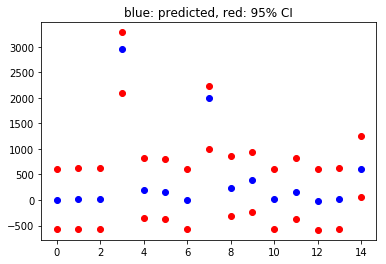

In [53]:
prstd, iv_l, iv_u = wls_prediction_std(lm2)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

### Holdout

In [54]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups

tempFeats = pd.DataFrame()
tempFeats = feats[['Population','Robbery','RobberyFull','MurderFull']]
target = feats['PropertyCrime']

X_train, X_test, y_train, y_test = train_test_split(tempFeats, target, test_size=0.2, random_state=20)

data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

lm2_h_test = smf.ols(formula=linear_formula2, data=data_test).fit()
lm2_h_train = smf.ols(formula=linear_formula2, data=data_train).fit()

print('With 20% Holdout: ' + str(lm2_h_train.rsquared))
print('Testing on Sample: ' + str(lm2_h_test.rsquared))






With 20% Holdout: 0.934771328827
Testing on Sample: 0.999772814031


# QUESTION

Holdout group is inconsistent, what do I need to do with that?

### Cross Validation Score

In [91]:
from sklearn.model_selection import cross_val_score
tempFeats = pd.DataFrame()
tempFeats = pd.DataFrame()


cross_val_score(regr, data, target, cv=10)

ValueError: could not convert string to float: 'Yorktown'

# QUESTION:
What object do you pass "cross_val_score"?

### New Data Set

In [56]:
df2 = pd.read_csv('Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.csv', encoding = "ISO-8859-1")
df2.head()

City Population Violent\ncrime  \
0             Adams Village      1,851              0   
1  Addison Town and Village      2,568              2   
2            Afton Village4        820              0   
3             Akron Village      2,842              1   
4                   Albany4     98,595            802   

   Murder and\nnonnegligent\nmanslaughter Rape\n(revised\ndefinition)1  \
0                                     0.0                          NaN   
1                                     0.0                          NaN   
2                                     0.0                            0   
3                                     0.0                          NaN   
4                                     8.0                           54   

   Rape\n(legacy\ndefinition)2 Robbery Aggravated\nassault Property\ncrime  \
0                          0.0       0                   0              11   
1                          0.0       1                   1              49   
2                          NaN       0                   0               1   
3                          0.0       0                   1              17   
4                          NaN     237                 503           3,888   

  Burglary Larceny-\ntheft Motor\nvehicle\ntheft  Arson3  Unnamed: 13  
0        1              10                     0     0.0          NaN  
1        1              47                     1     0.0          NaN  
2        0               1                     0     0.0          NaN  
3        0              17                     0     0.0          NaN  
4      683           3,083                   122    12.0          NaN

In [57]:
df2[-8:]

City Population  \
368                                Youngstown Village4      1,896   
369  1 The figures shown in this column for the off...        NaN   
370  2 The figures shown in this column for the off...        NaN   
371  3 The FBI does not publish arson data unless i...        NaN   
372  4 This agency began the year submitting rape d...        NaN   
373  5 The FBI determined that the agency's data we...        NaN   
374                                                NaN        NaN   
375                                                           NaN   

    Violent\ncrime  Murder and\nnonnegligent\nmanslaughter  \
368              0                                     0.0   
369            NaN                                     NaN   
370            NaN                                     NaN   
371            NaN                                     NaN   
372            NaN                                     NaN   
373            NaN                                     NaN   
374            NaN                                     NaN   
375            NaN                                     NaN   

    Rape\n(revised\ndefinition)1  Rape\n(legacy\ndefinition)2 Robbery  \
368                            0                          NaN       0   
369                          NaN                          NaN     NaN   
370                          NaN                          NaN     NaN   
371                          NaN                          NaN     NaN   
372                          NaN                          NaN     NaN   
373                          NaN                          NaN     NaN   
374                          NaN                          NaN     NaN   
375                          NaN                          NaN     NaN   

    Aggravated\nassault Property\ncrime Burglary Larceny-\ntheft  \
368                   0               1        0               1   
369                 NaN             NaN      NaN             NaN   
370                 NaN             NaN      NaN             NaN   
371                 NaN             NaN      NaN             NaN   
372                 NaN             NaN      NaN             NaN   
373                 NaN             NaN      NaN             NaN   
374                 NaN             NaN      NaN             NaN   
375                 NaN             NaN      NaN             NaN   

    Motor\nvehicle\ntheft  Arson3  Unnamed: 13  
368                     0     0.0          NaN  
369                   NaN     NaN          NaN  
370                   NaN     NaN          NaN  
371                   NaN     NaN          NaN  
372                   NaN     NaN          NaN  
373                   NaN     NaN          NaN  
374                   NaN     NaN          NaN  
375                   NaN     NaN          NaN

In [58]:
df2 = df2[:-7]
df2[-1:]

City Population Violent\ncrime  \
368  Youngstown Village4      1,896              0   

     Murder and\nnonnegligent\nmanslaughter Rape\n(revised\ndefinition)1  \
368                                     0.0                            0   

     Rape\n(legacy\ndefinition)2 Robbery Aggravated\nassault Property\ncrime  \
368                          NaN       0                   0               1   

    Burglary Larceny-\ntheft Motor\nvehicle\ntheft  Arson3  Unnamed: 13  
368        0               1                     0     0.0          NaN

In [59]:
featsTest1 = pd.DataFrame()
featsTest1['PropertyCrime'] = df2['Property\ncrime'].str.replace(',','').astype(float)
featsTest1['Population'] = df2['Population'].fillna(0)
featsTest1['Population'] = featsTest1['Population'].str.replace(',','').astype(float)
featsTest1['PopSq'] = np.square(featsTest1['Population'])
featsTest1['MurderFull'] = df2['Murder and\nnonnegligent\nmanslaughter'].astype(float)
featsTest1['Murder'] = [m if m == 0 else m/m for m in df2['Murder and\nnonnegligent\nmanslaughter']  ]
featsTest1['RobberyFull'] = df2['Robbery'].fillna(0)
featsTest1['RobberyFull'] = featsTest1['RobberyFull'].str.replace(',','').astype(float)
featsTest1['Robbery'] = [r if r == 0 else r/r for r in featsTest1['RobberyFull']]

In [60]:
featsTest1.describe()

PropertyCrime    Population         PopSq  MurderFull      Murder  \
count     368.000000  3.690000e+02  3.690000e+02  369.000000  369.000000   
mean      698.361413  3.781482e+04  1.955238e+11    1.452575    0.138211   
std      7123.613877  4.411591e+05  3.738111e+12   17.693912    0.345590   
min         0.000000  7.900000e+01  6.241000e+03    0.000000    0.000000   
25%        25.000000  2.631000e+03  6.922161e+06    0.000000    0.000000   
50%        76.000000  6.581000e+03  4.330956e+07    0.000000    0.000000   
75%       271.500000  1.540800e+04  2.374065e+08    0.000000    0.000000   
max    135747.000000  8.473938e+06  7.180763e+13  333.000000    1.000000   

        RobberyFull     Robbery  
count    369.000000  369.000000  
mean      60.661247    0.531165  
std      866.480865    0.499705  
min        0.000000    0.000000  
25%        0.000000    0.000000  
50%        1.000000    1.000000  
75%        4.000000    1.000000  
max    16581.000000    1.000000

In [61]:
linear_formulaTest1 = 'PropertyCrime ~ Population+Robbery+RobberyFull+MurderFull'
lmTest1 = smf.ols(formula=linear_formulaTest1, data=featsTest1).fit()

In [62]:
reTest1_Rsq = lmTest1.rsquared
print('Test Set 1 r-squared', reTest1_Rsq)

Test Set 1 r-squared 0.998435907196


In [63]:
df3 = pd.read_csv('table_8_offenses_known_to_law_enforcement_texas_by_city_2013.csv', encoding = "ISO-8859-1")
df3.head()

City Population Violent\ncrime  \
0      Abernathy      2,821              0   
1        Abilene    119,401            477   
2        Addison     15,961             51   
3          Alamo     18,876            164   
4  Alamo Heights      7,443              9   

   Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
0                                     0.0                           NaN   
1                                     1.0                           NaN   
2                                     1.0                           NaN   
3                                     0.0                           NaN   
4                                     0.0                           NaN   

   Rape\n(legacy\ndefinition)2 Robbery Aggravated\nassault Property\ncrime  \
0                          0.0       0                   0              12   
1                         37.0     125                 314           4,769   
2                          4.0      11                  35             784   
3                         11.0      27                 126           1,336   
4                          2.0       2                   5             235   

  Burglary Larceny-\ntheft Motor\nvehicle\ntheft  Arson3  Unnamed: 13  
0       12               0                     0     1.0          NaN  
1    1,055           3,460                   254    16.0          NaN  
2      129             593                    62     1.0          NaN  
3      203           1,052                    81     1.0          NaN  
4       36             194                     5     0.0          NaN

In [64]:
df3[-4:]

City Population  \
603                                           Yorktown      2,133   
604  1 The figures shown in this column for the off...        NaN   
605  2 The figures shown in this column for the off...        NaN   
606  3 The FBI does not publish arson data unless i...        NaN   

    Violent\ncrime  Murder and\nnonnegligent\nmanslaughter  \
603             12                                     0.0   
604            NaN                                     NaN   
605            NaN                                     NaN   
606            NaN                                     NaN   

     Rape\n(revised\ndefinition)1  Rape\n(legacy\ndefinition)2 Robbery  \
603                           NaN                          7.0       0   
604                           NaN                          NaN     NaN   
605                           NaN                          NaN     NaN   
606                           NaN                          NaN     NaN   

    Aggravated\nassault Property\ncrime Burglary Larceny-\ntheft  \
603                   5              52       21              30   
604                 NaN             NaN      NaN             NaN   
605                 NaN             NaN      NaN             NaN   
606                 NaN             NaN      NaN             NaN   

    Motor\nvehicle\ntheft  Arson3  Unnamed: 13  
603                     1     0.0          NaN  
604                   NaN     NaN          NaN  
605                   NaN     NaN          NaN  
606                   NaN     NaN          NaN

In [65]:
df3 = df3[:-3]
df3[-1:]

City Population Violent\ncrime  \
603  Yorktown      2,133             12   

     Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
603                                     0.0                           NaN   

     Rape\n(legacy\ndefinition)2 Robbery Aggravated\nassault Property\ncrime  \
603                          7.0       0                   5              52   

    Burglary Larceny-\ntheft Motor\nvehicle\ntheft  Arson3  Unnamed: 13  
603       21              30                     1     0.0          NaN

In [66]:
featsTest2 = pd.DataFrame()
featsTest2['PropertyCrime'] = df3['Property\ncrime'].str.replace(',','').astype(float)
featsTest2['Population'] = df3['Population'].fillna(0)
featsTest2['Population'] = featsTest2['Population'].str.replace(',','').astype(float)
featsTest2['PopSq'] = np.square(featsTest2['Population'])
featsTest2['MurderFull'] = df3['Murder and\nnonnegligent\nmanslaughter'].astype(float)
featsTest2['Murder'] = [m if m == 0 else m/m for m in df3['Murder and\nnonnegligent\nmanslaughter']  ]
featsTest2['RobberyFull'] = df3['Robbery'].fillna(0)
featsTest2['RobberyFull'] = featsTest2['RobberyFull'].str.replace(',','').astype(float)
featsTest2['Robbery'] = [r if r == 0 else r/r for r in featsTest2['RobberyFull']]

In [67]:
featsTest2.describe()

PropertyCrime    Population         PopSq  MurderFull      Murder  \
count     604.000000  6.040000e+02  6.040000e+02  604.000000  604.000000   
mean     1158.044702  3.068933e+04  1.867284e+10    1.395695    0.253311   
std      6482.389655  1.332682e+05  2.227648e+11   11.165009    0.435268   
min         0.000000  1.680000e+02  2.822400e+04    0.000000    0.000000   
25%        44.000000  2.539000e+03  6.446521e+06    0.000000    0.000000   
50%       138.500000  5.567500e+03  3.099711e+07    0.000000    0.000000   
75%       497.500000  1.613025e+04  2.601875e+08    1.000000    1.000000   
max    110919.000000  2.180606e+06  4.755043e+12  214.000000    1.000000   

       RobberyFull     Robbery  
count   604.000000  604.000000  
mean     44.995033    0.650662  
std     451.371499    0.477156  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       2.000000    1.000000  
75%       7.000000    1.000000  
max    9891.000000    1.000000

In [68]:
linear_formulaTest2 = 'PropertyCrime ~ Population+Robbery+RobberyFull+MurderFull'
lmTest2 = smf.ols(formula=linear_formulaTest2, data=featsTest2).fit()

In [69]:
reTest2_Rsq = lmTest2.rsquared
print('Test Set 2 r-squared', reTest2_Rsq)

Test Set 2 r-squared 0.970758806761


In [70]:
test2Pvals = lmTest2.pvalues
print(initPvals)

Intercept      4.061628e-01
Population     3.673483e-37
PopSq          2.110196e-17
Robbery        2.662292e-03
RobberyFull    5.782981e-04
MurderFull     4.469698e-14
dtype: float64


In [71]:
lmTest2.conf_int()

0          1
Intercept   -218.799342  82.065636
Population     0.041187   0.044611
Robbery     -440.473823 -59.318364
RobberyFull    1.140729   2.962524
MurderFull   -57.005450  28.569501

In [72]:
linear_formulaTest2 = 'PropertyCrime ~ Population'
lmTest2 = smf.ols(formula=linear_formulaTest2, data=featsTest2).fit()

In [73]:
reTest2_Rsq = lmTest2.rsquared
print(reTest2_Rsq)

0.966816423695


### Clean the rest of the data set
This is in preparation of finding new features.

In [74]:
df3.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2               float64
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
Unnamed: 13                               float64
dtype: object

In [75]:
df3_clean = pd.DataFrame()
df3_clean = df3.fillna(0)
df3_clean['Murder'] = df3_clean['Murder and\nnonnegligent\nmanslaughter']
df3_clean['Unnamed'] = df3_clean['Unnamed: 13']
df3_clean['Rape1'] = df3_clean['Rape\n(revised\ndefinition)1']
df3_clean['Rape2'] = df3_clean['Rape\n(legacy\ndefinition)2']
df3_clean['Population'] = df3_clean['Population'].str.replace(',','').astype(float)
df3_clean['ViolentCrime'] = df3_clean['Violent\ncrime'].str.replace(',','').astype(float)
df3_clean['Robbery'] = df3_clean['Robbery'].str.replace(',','').astype(float)
df3_clean['AggAssault'] = df3_clean['Aggravated\nassault'].str.replace(',','').astype(float)
df3_clean['PropertyCrime'] = df3_clean['Property\ncrime'].str.replace(',','').astype(float)
df3_clean['Burglary'] = df3_clean['Burglary'].str.replace(',','').astype(float)
df3_clean['LarcenyTheft'] = df3_clean['Larceny-\ntheft'].str.replace(',','').astype(float)
df3_clean['MotorVehicleTheft'] = df3_clean['Motor\nvehicle\ntheft'].str.replace(',','').astype(float)
df3_clean = df3_clean.drop(['Unnamed: 13','Murder and\nnonnegligent\nmanslaughter','Rape\n(legacy\ndefinition)2','Rape\n(revised\ndefinition)1','Violent\ncrime','Aggravated\nassault','Property\ncrime','Larceny-\ntheft','Motor\nvehicle\ntheft' ], axis=1)

In [76]:
df3_clean.dtypes

City                  object
Population           float64
Robbery              float64
Burglary             float64
Arson3               float64
Murder               float64
Unnamed              float64
Rape1                float64
Rape2                float64
ViolentCrime         float64
AggAssault           float64
PropertyCrime        float64
LarcenyTheft         float64
MotorVehicleTheft    float64
dtype: object

In [77]:
linear_formulaTest2_full = 'PropertyCrime~Population+Robbery+Burglary+Arson3+Murder+Unnamed+Rape1+Rape2+ViolentCrime+AggAssault+PropertyCrime+LarcenyTheft+MotorVehicleTheft'
lmTest2_full = smf.ols(formula=linear_formulaTest2_full, data=df3_clean).fit()
test2_fullPvals = lmTest2_full.pvalues
print(test2_fullPvals)

Intercept            0.453936
Population           0.892809
Robbery              0.713431
Burglary             0.000000
Arson3               0.259422
Murder               0.787987
Unnamed              0.000000
Rape1                0.885118
Rape2                0.822473
ViolentCrime         0.824554
AggAssault           0.857114
PropertyCrime        0.000000
LarcenyTheft         0.000000
MotorVehicleTheft    0.000000
dtype: float64


In [78]:
linear_formulaTest2_full = 'PropertyCrime~LarcenyTheft+MotorVehicleTheft'
lmTest2_full = smf.ols(formula=linear_formulaTest2_full, data=df3_clean).fit()
test2_fullPvals = lmTest2_full.pvalues
print(test2_fullPvals)

Intercept             2.004142e-04
LarcenyTheft          0.000000e+00
MotorVehicleTheft    8.005414e-296
dtype: float64


### RFE

# QUESTION: 
What object do you pass RFE?

In [79]:
from sklearn.feature_selection import RFE

tempFeats = pd.DataFrame()
tempFeats = df3_clean.drop(['PropertyCrime'], axis=1)

target = df3_clean['PropertyCrime']
data = tempFeats

#featSelector = RFE(bnb)
#featSelector = featSelector.fit(data, target)

# Write Up

Started with the origional model (with out the changes made for assumptions) since this model had the highest R-squared.

In [80]:
print(initRsq)

0.998780265433


Dropped Murder feature the Based on the following pValues:

In [81]:
print(initPvals)

Intercept      4.061628e-01
Population     3.673483e-37
PopSq          2.110196e-17
Robbery        2.662292e-03
RobberyFull    5.782981e-04
MurderFull     4.469698e-14
dtype: float64


The change had little effect on R-squared:

In [82]:
print(reFit1_Rsq)

0.998774561232


### Confidence Intervals

In [83]:
lm1.conf_int()

0             1
Intercept   -6.544112e+01  2.654556e+01
Population   1.273543e-02  1.675817e-02
PopSq       -1.128229e-09 -7.221209e-10
Robbery      3.436909e+01  1.619791e+02
RobberyFull  9.969178e-01  3.598809e+00
MurderFull   8.790222e+01  1.464011e+02

The Populatation Squared feature was dropped for the 2nd Re-fit due to a large Confidence Interval.  This had little effect on the R-squared value.

In [84]:
print(reFit2_Rsq)

0.998486778018


### Holdout Group

R-squared comparison with holdout of 20% of training data showed inconsisten results.

In [85]:
print('With 20% Holdout: ' + str(lm2_h_train.rsquared))
print('Testing on Sample: ' + str(lm2_h_test.rsquared))

With 20% Holdout: 0.934771328827
Testing on Sample: 0.999772814031


### Test Set 1: Same State, Different Year

The model was tested on a new Data Set that consisted of Crime Data from the same state but for a different year.  The model consisted of the following features:

- Population
- Robbery
- RobberyFull
- MurderFull

The r-squared values for the training set and the test set were very close so there was no change to the model needed.


In [86]:
print('Test Set 1 r-squared: ', reTest1_Rsq)
print('Training Set r-squared: ',reFit2_Rsq)

Test Set 1 r-squared:  0.998435907196
Training Set r-squared:  0.998486778018


### Test Set 2: Same Year, Different State

The model was tested on a second test Data Set that consisted of Crime Data from a different state but for the same year.  The r-squared values were significantly different.

In [87]:
print('Training Set r-squared: ',reFit2_Rsq)
print('Test Set 2 r-squared', reTest2_Rsq)

Training Set r-squared:  0.998486778018
Test Set 2 r-squared 0.966816423695
